In [ ]:
!pip install kaggle

In [ ]:
import os
print(os.getcwd())

/content


In [ ]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# daatset api
!kaggle competitions download -c cifar-10

cifar-10.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!ls

cifar-10.zip  kaggle.json  sample_data


In [ ]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/cifar-10.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
!ls

cifar-10.zip  kaggle.json  sample_data	sampleSubmission.csv  test.7z  train.7z  trainLabels.csv


In [ ]:
!pip install py7zr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.9/67.9 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 43.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.3/93.3 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 29.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.0/139.0 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.7/413.7 kB 17.3 MB/s eta 0:00:00


In [ ]:
import py7zr

archive = py7zr.SevenZipFile('/content/train.7z', mode='r')
archive.extractall()     #archive.extractall(path='/content/Training Data')
archive.close()

In [ ]:
!ls

cifar-10.zip  sample_data	    test.7z  train.7z
kaggle.json   sampleSubmission.csv  train    trainLabels.csv


Importing the Dependencies

In [ ]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

In [ ]:
filenames = os.listdir('/content/train')

In [ ]:
type(filenames)

list

In [ ]:
len(filenames)

50000

In [ ]:
print(filenames[0:5])
print(filenames[-5:])

['3834.png', '617.png', '11214.png', '32221.png', '34639.png']
['23821.png', '16095.png', '4357.png', '35545.png', '49252.png']


**Labels Processing**

In [ ]:
labels_df = pd.read_csv('/content/trainLabels.csv')

In [ ]:
labels_df.shape

(50000, 2)

In [ ]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [ ]:
labels_df[labels_df['id'] == 7796]

,id,label
7795,7796,frog


In [ ]:
labels_df.head(10)

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile
5,6,automobile
6,7,bird
7,8,horse
8,9,ship
9,10,cat


In [ ]:
labels_df.tail(10)

,id,label
49990,49991,deer
49991,49992,bird
49992,49993,airplane
49993,49994,automobile
49994,49995,airplane
49995,49996,bird
49996,49997,frog
49997,49998,truck
49998,49999,automobile
49999,50000,automobile


In [ ]:
labels_df['label'].value_counts()

,count
label,
frog,5000
truck,5000
deer,5000
automobile,5000
bird,5000
horse,5000
ship,5000
cat,5000
dog,5000


In [ ]:
labels_df['label']

,label
0,frog
1,truck
2,truck
3,deer
4,automobile
...,...
49995,bird
49996,frog
49997,truck
49998,automobile


In [ ]:
labels_dictionary = {'airplane':0, 'automobile':1, 'bird':2, 'cat':3, 'deer':4, 'dog':5, 'frog':6, 'horse':7, 'ship':8, 'truck':9}

labels = [labels_dictionary[i] for i in labels_df['label']]

In [ ]:
print(labels[0:5])
print(labels[-5:])

[6, 9, 9, 4, 1]
[2, 6, 9, 1, 1]


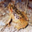

In [ ]:
# displaying sample image
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/train/7796.png')
cv2_imshow(img)

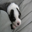

In [ ]:
# displaying sample image
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/train/45888.png')
cv2_imshow(img)

In [ ]:
labels_df[labels_df['id'] == 45888]

,id,label
45887,45888,dog


In [ ]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [ ]:
id_list = list(labels_df['id'])

In [ ]:
print(id_list[0:5])
print(id_list[-5:])

[1, 2, 3, 4, 5]
[49996, 49997, 49998, 49999, 50000]


**Image Processing**

In [ ]:
# convert images to numpy arrays

train_data_folder = '/content/train/'

data = []

for id in id_list:

  image = Image.open(train_data_folder + str(id) + '.png')
  image = np.array(image)
  data.append(image)

In [ ]:
type(data)

list

In [ ]:
len(data)

50000

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape

(32, 32, 3)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
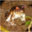

In [ ]:
data[0]

In [ ]:
# convert image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
print(X.shape)
print(Y.shape)

(50000, 32, 32, 3)
(50000,)


**Train Test Split**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(50000, 32, 32, 3) (40000, 32, 32, 3) (10000, 32, 32, 3)


In [ ]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [ ]:
X_train_scaled

array([[[[0.81960784, 0.82352941, 0.79607843],
         [0.83529412, 0.83921569, 0.81960784],
         [0.85490196, 0.85882353, 0.84313725],
         ...,
         [0.49803922, 0.29019608, 0.15294118],
         [0.47843137, 0.26666667, 0.1372549 ],
         [0.45490196, 0.24705882, 0.1254902 ]],

        [[0.82352941, 0.82352941, 0.79215686],
         [0.83529412, 0.83921569, 0.81176471],
         [0.85490196, 0.8627451 , 0.83921569],
         ...,
         [0.48627451, 0.2745098 , 0.1372549 ],
         [0.4745098 , 0.2627451 , 0.12941176],
         [0.48235294, 0.27058824, 0.14117647]],

        [[0.80784314, 0.80392157, 0.76470588],
         [0.81960784, 0.81960784, 0.79215686],
         [0.83529412, 0.84313725, 0.81960784],
         ...,
         [0.48627451, 0.2745098 , 0.14509804],
         [0.51372549, 0.30196078, 0.16470588],
         [0.51372549, 0.30588235, 0.16078431]],

        ...,

        [[0.49803922, 0.42352941, 0.38039216],
         [0.54117647, 0.47843137, 0.43137255]

array([[[209, 210, 203],
        [213, 214, 209],
        [218, 219, 215],
        ...,
        [127,  74,  39],
        [122,  68,  35],
        [116,  63,  32]],

       [[210, 210, 202],
        [213, 214, 207],
        [218, 220, 214],
        ...,
        [124,  70,  35],
        [121,  67,  33],
        [123,  69,  36]],

       [[206, 205, 195],
        [209, 209, 202],
        [213, 215, 209],
        ...,
        [124,  70,  37],
        [131,  77,  42],
        [131,  78,  41]],

       ...,

       [[127, 108,  97],
        [138, 122, 110],
        [141, 127, 118],
        ...,
        [158, 149, 134],
        [161, 156, 151],
        [136, 137, 148]],

       [[145, 130, 119],
        [148, 135, 128],
        [136, 127, 128],
        ...,
        [175, 174, 172],
        [160, 161, 170],
        [143, 148, 164]],

       [[138, 128, 123],
        [140, 132, 136],
        [136, 131, 140],
        ...,
        [150, 154, 169],
        [145, 149, 166],
        [140, 145, 163]]], dtype=uint8)
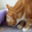

In [ ]:
X_train[0]

**Building a simple Neural Network**

In [ ]:
import tensorflow as tf
from tensorflow import keras


In [ ]:
num_of_classes = 10

# setting up the layers of Neural Network

model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(num_of_classes, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 64)                  │         147,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 167,562 (654.54 KB)

 Trainable params: 167,562 (654.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
# training the neural network
history=model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 62s 53ms/step - acc: 0.3565 - loss: 1.7652 - val_acc: 0.5533 - val_loss: 1.2524
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 82s 53ms/step - acc: 0.5759 - loss: 1.2152 - val_acc: 0.6170 - val_loss: 1.0992
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 55s 49ms/step - acc: 0.6387 - loss: 1.0368 - val_acc: 0.6382 - val_loss: 1.0215
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 56s 50ms/step - acc: 0.6750 - loss: 0.9357 - val_acc: 0.6405 - val_loss: 1.0090
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 81s 49ms/step - acc: 0.6992 - loss: 0.8639 - val_acc: 0.6690 - val_loss: 0.9358
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 57s 51ms/step - acc: 0.7297 - loss: 0.7796 - val_acc: 0.6720 - val_loss: 0.9397
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 58s 51ms/step - acc: 0.7532 - loss: 0.7184 - val_acc: 0.6862 - val_loss: 0.9132
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 82s 52ms/step - acc: 0.7709 - loss: 0.6660 - val_acc: 0.6762 - val_loss: 0.9484
Epoch 9/10
1125/1125 ━━━

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - acc: 0.6730 - loss: 1.0120
Test Accuracy = 0.6790000200271606


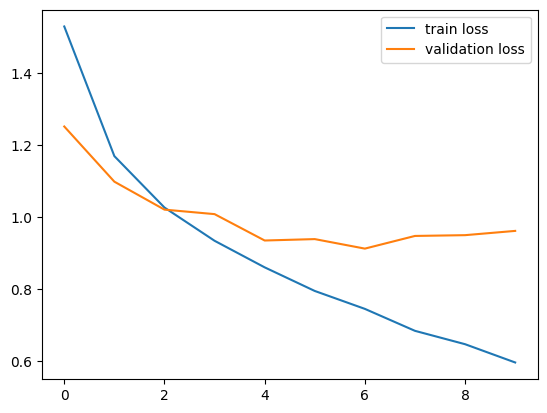

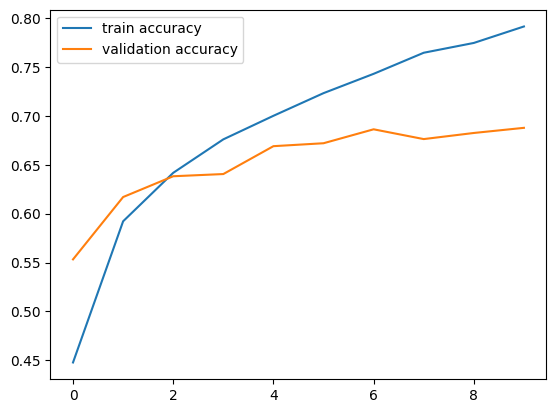

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**ResNet50**

In [ ]:
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

In [ ]:
convolutional_base = ResNet50(weights='imagenet', include_top=False, input_shape=(256,256,3))
convolutional_base.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 256, 256, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 262, 262, 3)    │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 128, 128, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 128, 128, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 128, 128, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 130, 130, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 64, 64, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 64, 64, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 64, 64, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 64, 64, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 64, 64, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 64, 64, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 64, 64, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 64, 64, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 64, 64, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [ ]:
num_of_classes = 10

model = models.Sequential()
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(convolutional_base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(num_of_classes, activation='softmax'))

In [ ]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5), loss='sparse_categorical_crossentropy', metrics=['acc'])

In [ ]:
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 437s 339ms/step - acc: 0.3266 - loss: 2.0501 - val_acc: 0.6745 - val_loss: 1.0739
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 408s 337ms/step - acc: 0.6698 - loss: 1.0785 - val_acc: 0.8765 - val_loss: 0.5123
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 381s 337ms/step - acc: 0.7965 - loss: 0.7605 - val_acc: 0.9193 - val_loss: 0.3485
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 382s 337ms/step - acc: 0.8678 - loss: 0.5801 - val_acc: 0.9293 - val_loss: 0.2987
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 391s 344ms/step - acc: 0.9039 - loss: 0.4575 - val_acc: 0.9362 - val_loss: 0.2460
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 388s 345ms/step - acc: 0.9312 - loss: 0.3636 - val_acc: 0.9367 - val_loss: 0.2347
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 442s 345ms/step - acc: 0.9506 - loss: 0.2853 - val_acc: 0.9358 - val_loss: 0.2235
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 442s 345ms/step - acc: 0.9633 - loss: 0.2387 - val_acc: 0.9430 - val_loss: 0.2185
Epoch 9/

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 38s 110ms/step - acc: 0.9364 - loss: 0.2384
Test Accuracy = 0.9373000264167786


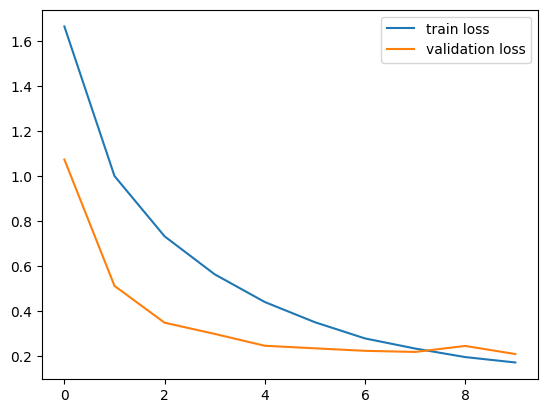

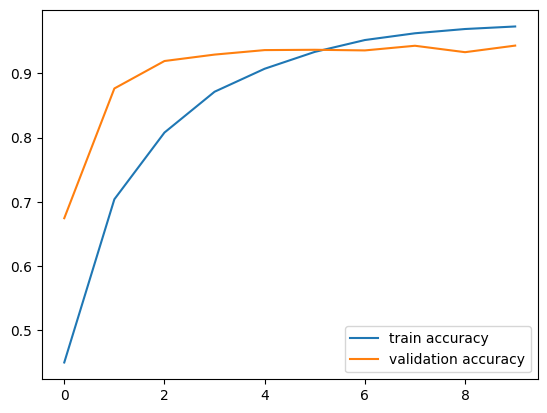

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


MobileNet


In [ ]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras import models

In [ ]:
# Load ResNet-101
convolutional_base = MobileNet(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
convolutional_base.summary()

<ipython-input-86-350791af8f9e>:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  convolutional_base = MobileNet(weights='imagenet', include_top=False, input_shape=(32, 32, 3))


17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "mobilenet_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1 (Conv2D)                       │ (None, 16, 16, 32)          │             864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_bn (BatchNormalization)        │ (None, 16, 16, 32)          │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_relu (ReLU)                    │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1 (DepthwiseConv2D)          │ (None, 16, 16, 32)          │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_bn (BatchNormalization)    │ (None, 16, 16, 32)          │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_relu (ReLU)                │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1 (Conv2D)                   │ (None, 16, 16, 64)          │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_bn (BatchNormalization)    │ (None, 16, 16, 64)          │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_relu (ReLU)                │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pad_2 (ZeroPadding2D)           │ (None, 17, 17, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2 (DepthwiseConv2D)          │ (None, 8, 8, 64)            │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_bn (BatchNormalization)    │ (None, 8, 8, 64)            │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_relu (ReLU)                │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2 (Conv2D)                   │ (None, 8, 8, 128)           │           8,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_bn (BatchNormalization)    │ (None, 8, 8, 128)           │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_relu (ReLU)                │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3 (DepthwiseConv2D)          │ (None, 8, 8, 128)           │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_bn (BatchNormalization)    │ (None, 8, 8, 128)           │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_relu (ReLU)                │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_3 (Conv2D)                   │ (None, 8, 8, 128)           │          16,384 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 3,228,864 (12.32 MB)

 Trainable params: 3,206,976 (12.23 MB)

 Non-trainable params: 21,888 (85.50 KB)

In [ ]:
# Freeze the convolutional base
convolutional_base.trainable = False

In [ ]:
# Build the model
model = models.Sequential()
#model.add(layers.Resizing(150, 150, interpolation="bilinear", input_shape=(32, 32, 3))) # Resize input to 150x150
model.add(convolutional_base)           # Add InceptionV3 base
model.add(layers.GlobalAveragePooling2D())  # Use global average pooling
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(10, activation='softmax'))  # 10 classes

In [ ]:
# Compile the model
model.compile(optimizer=optimizers.Adam(learning_rate=1e-4),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 443s 376ms/step - accuracy: 0.1631 - loss: 2.6114 - val_accuracy: 0.5160 - val_loss: 1.4548
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 437s 372ms/step - accuracy: 0.3813 - loss: 1.7942 - val_accuracy: 0.6375 - val_loss: 1.1200
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 440s 370ms/step - accuracy: 0.5212 - loss: 1.4457 - val_accuracy: 0.6998 - val_loss: 0.9320
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 438s 366ms/step - accuracy: 0.6079 - loss: 1.2418 - val_accuracy: 0.7337 - val_loss: 0.8118
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 442s 366ms/step - accuracy: 0.6596 - loss: 1.1081 - val_accuracy: 0.7617 - val_loss: 0.7356
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 438s 363ms/step - accuracy: 0.6975 - loss: 0.9972 - val_accuracy: 0.7715 - val_loss: 0.6986
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 443s 364ms/step - accuracy: 0.7332 - loss: 0.9077 - val_accuracy: 0.7890 - val_loss: 0.6624
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 444s 366ms/step - ac

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7841 - loss: 0.6473
Test Accuracy = 0.7942000031471252


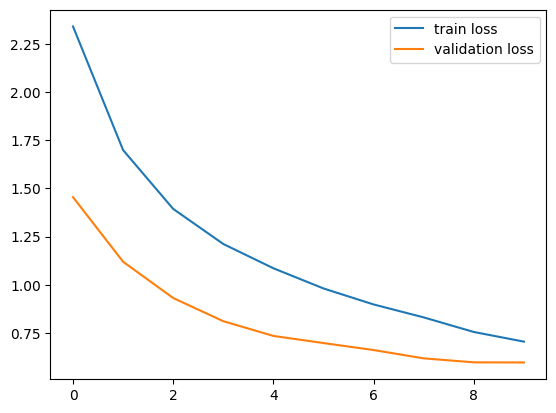

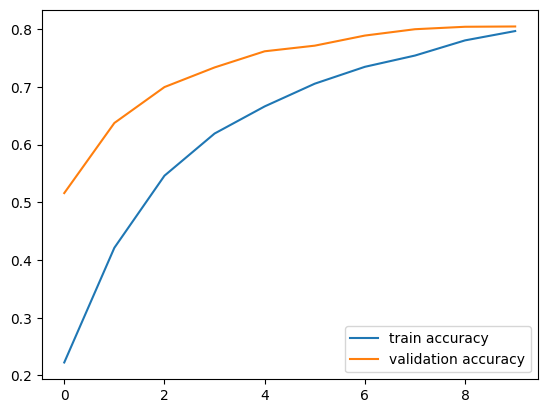

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['accuracy'], label='train accuracy')
plt.plot(h.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

MobileNetV2

In [ ]:
from tensorflow.keras.applications import MobileNetV2

In [ ]:
mobilenet_v2_base = MobileNetV2(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model = models.Sequential([
    layers.Resizing(128, 128, interpolation='bilinear', input_shape=(32, 32, 3)),
    mobilenet_v2_base,
    layers.GlobalAveragePooling2D(),  # Reduce dimensionality
    layers.BatchNormalization(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.BatchNormalization(),
    layers.Dense(10, activation='softmax')  # Assuming 10 classes
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer=optimizers.Adam(learning_rate=1e-4),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10, batch_size=32)

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 102s 44ms/step - accuracy: 0.4134 - loss: 1.8332 - val_accuracy: 0.6823 - val_loss: 1.0499
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 54s 42ms/step - accuracy: 0.8135 - loss: 0.7156 - val_accuracy: 0.8783 - val_loss: 0.4272
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 82s 42ms/step - accuracy: 0.8819 - loss: 0.4978 - val_accuracy: 0.8842 - val_loss: 0.4114
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 82s 41ms/step - accuracy: 0.9087 - loss: 0.3901 - val_accuracy: 0.9140 - val_loss: 0.2944
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 83s 42ms/step - accuracy: 0.9292 - loss: 0.3074 - val_accuracy: 0.9115 - val_loss: 0.3083
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 82s 43ms/step - accuracy: 0.9417 - loss: 0.2525 - val_accuracy: 0.9085 - val_loss: 0.3238
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 80s 41ms/step - accuracy: 0.9533 - loss: 0.2071 - val_accuracy: 0.9205 - val_loss: 0.2839
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 83s 42ms/step - accuracy: 0.9600 

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9037 - loss: 0.3980
Test Accuracy = 0.9046000242233276


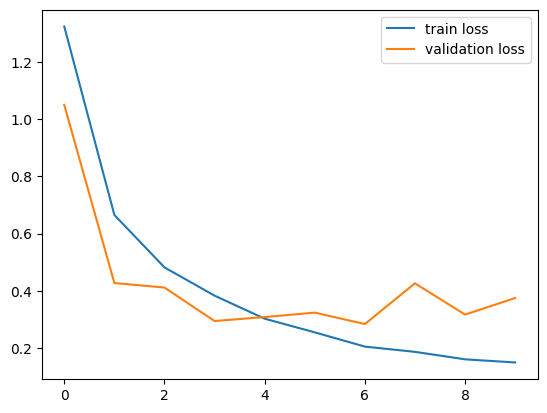

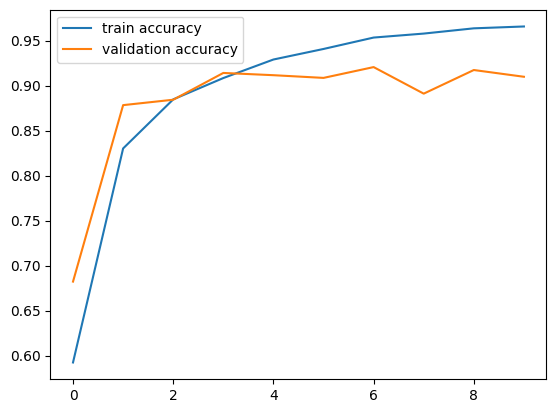

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['accuracy'], label='train accuracy')
plt.plot(h.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

MobileNetV3Small


In [ ]:
from tensorflow.keras.applications import MobileNetV3Small

In [ ]:
mobilenet_v3_base = MobileNetV3Small(weights='imagenet', include_top=False, input_shape=(128, 128, 3))


/usr/local/lib/python3.10/dist-packages/keras/src/applications/mobilenet_v3.py:452: UserWarning: `input_shape` is undefined or non-square, or `rows` is not 224. Weights for input shape (224, 224) will be loaded as the default.
  return MobileNetV3(


4334752/4334752 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model = models.Sequential([
    layers.Resizing(128, 128, interpolation='bilinear', input_shape=(32, 32, 3)),
    mobilenet_v3_base,
    layers.GlobalAveragePooling2D(),  # Reduce dimensionality
    layers.BatchNormalization(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.BatchNormalization(),
    layers.Dense(10, activation='softmax')  # Assuming 10 classes
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer=optimizers.Adam(learning_rate=1e-4),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10, batch_size=32)

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 78s 24ms/step - accuracy: 0.1822 - loss: 2.5236 - val_accuracy: 0.1047 - val_loss: 2.4104
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 50s 18ms/step - accuracy: 0.4620 - loss: 1.5572 - val_accuracy: 0.1217 - val_loss: 2.6127
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - accuracy: 0.6411 - loss: 1.1115 - val_accuracy: 0.1813 - val_loss: 2.3761
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 21s 18ms/step - accuracy: 0.7478 - loss: 0.8551 - val_accuracy: 0.2450 - val_loss: 2.3419
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 23s 20ms/step - accuracy: 0.8041 - loss: 0.6928 - val_accuracy: 0.3983 - val_loss: 1.6817
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 38s 17ms/step - accuracy: 0.8402 - loss: 0.5851 - val_accuracy: 0.6020 - val_loss: 1.2106
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 21s 18ms/step - accuracy: 0.8619 - loss: 0.5014 - val_accuracy: 0.6133 - val_loss: 1.1936
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 21s 18ms/step - accuracy: 0.8858 -

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.7961 - loss: 0.6763
Test Accuracy = 0.7918999791145325


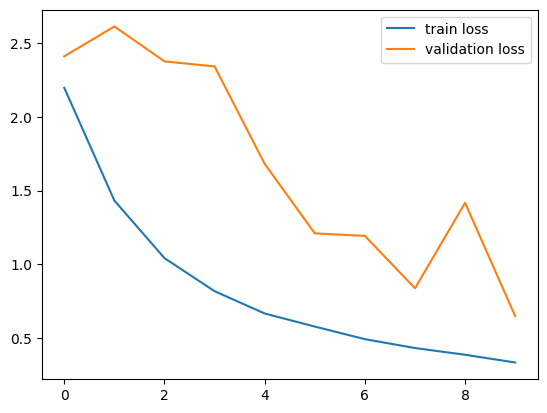

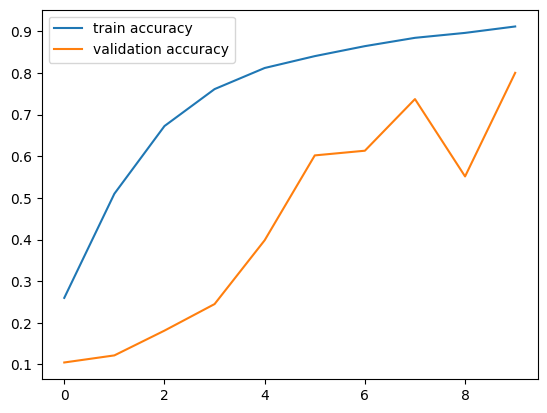

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['accuracy'], label='train accuracy')
plt.plot(h.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

MobileNetV3Large

In [ ]:
from tensorflow.keras.applications import MobileNetV3Large

In [ ]:
mobilenet_v3_base = MobileNetV3Large(weights='imagenet', include_top=False, input_shape=(128, 128, 3))


/usr/local/lib/python3.10/dist-packages/keras/src/applications/mobilenet_v3.py:517: UserWarning: `input_shape` is undefined or non-square, or `rows` is not 224. Weights for input shape (224, 224) will be loaded as the default.
  return MobileNetV3(


In [ ]:
model = models.Sequential([
    layers.Resizing(128, 128, interpolation='bilinear', input_shape=(32, 32, 3)),
    mobilenet_v3_base,
    layers.GlobalAveragePooling2D(),  # Reduce dimensionality
    layers.BatchNormalization(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.BatchNormalization(),
    layers.Dense(10, activation='softmax')  # Assuming 10 classes
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer=optimizers.Adam(learning_rate=1e-4),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10, batch_size=32)

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 107s 43ms/step - accuracy: 0.2411 - loss: 2.3024 - val_accuracy: 0.0945 - val_loss: 2.6985
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 39s 34ms/step - accuracy: 0.6470 - loss: 1.1344 - val_accuracy: 0.0955 - val_loss: 2.8022
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 41s 34ms/step - accuracy: 0.8110 - loss: 0.7172 - val_accuracy: 0.1128 - val_loss: 2.7219
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 42s 35ms/step - accuracy: 0.8695 - loss: 0.5228 - val_accuracy: 0.2185 - val_loss: 2.5028
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 40s 36ms/step - accuracy: 0.9104 - loss: 0.3850 - val_accuracy: 0.5355 - val_loss: 1.6085
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 39s 35ms/step - accuracy: 0.9325 - loss: 0.2986 - val_accuracy: 0.1982 - val_loss: 2.5089
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 41s 35ms/step - accuracy: 0.9430 - loss: 0.2480 - val_accuracy: 0.1560 - val_loss: 68.9503
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 44s 37ms/step - accuracy: 0.9561

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - accuracy: 0.8218 - loss: 53.1138
Test Accuracy = 0.8163999915122986


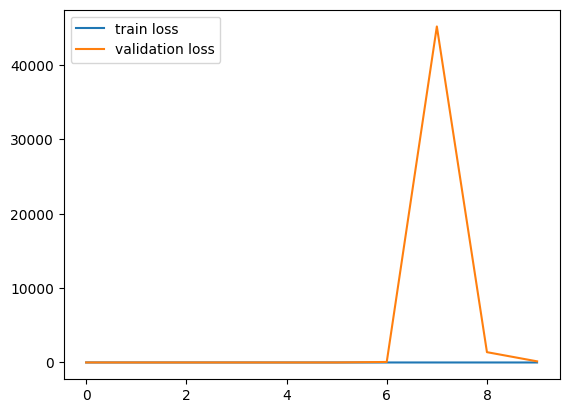

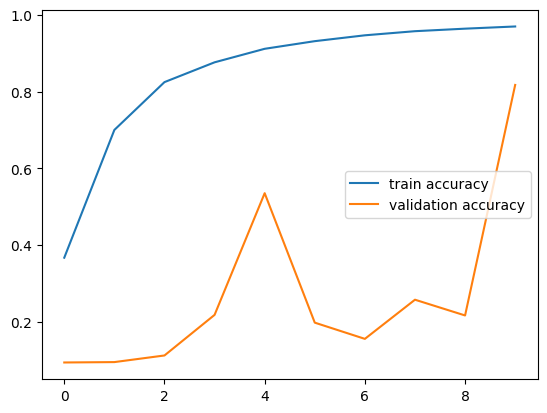

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['accuracy'], label='train accuracy')
plt.plot(h.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

VGG16


In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam

In [ ]:
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
vgg_base.trainable = False

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
model = Sequential([
    vgg_base,  # Pre-trained VGG16 base
    Flatten(),  # Flatten the feature maps
    Dense(256, activation='relu'),  # Fully connected layer
    Dropout(0.5),  # Regularization
    BatchNormalization(),  # Stabilize training
    Dense(10, activation='softmax')  # Output layer (10 classes for CIFAR-10)
])

In [ ]:
model.compile(optimizer=Adam(learning_rate=1e-4),  # Use a small learning rate
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10, batch_size=32)


Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.2306 - loss: 2.2973 - val_accuracy: 0.4785 - val_loss: 1.5178
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.4153 - loss: 1.6833 - val_accuracy: 0.5185 - val_loss: 1.4019
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.4621 - loss: 1.5464 - val_accuracy: 0.5403 - val_loss: 1.3393
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.4889 - loss: 1.4757 - val_accuracy: 0.5535 - val_loss: 1.3005
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.5088 - loss: 1.4224 - val_accuracy: 0.5670 - val_loss: 1.2690
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.5213 - loss: 1.3771 - val_accuracy: 0.5680 - val_loss: 1.2532
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.5297 - loss: 1.3504 - val_accuracy: 0.5732 - val_loss: 1.2298
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.5444 - loss: 1.3

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.5835 - loss: 1.2137
Test Accuracy = 0.5846999883651733


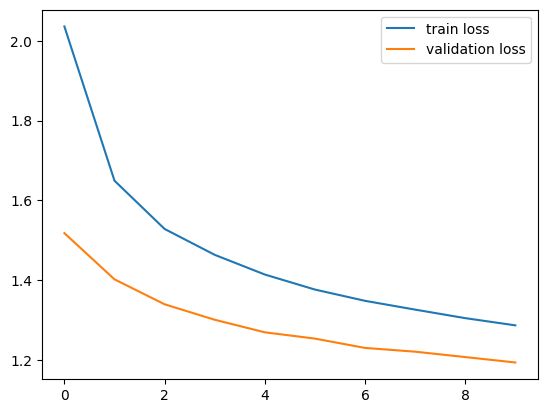

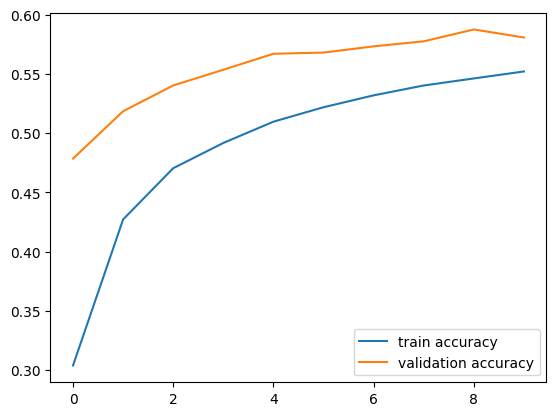

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['accuracy'], label='train accuracy')
plt.plot(h.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

VGG19

In [ ]:
from tensorflow.keras.applications import VGG19

In [ ]:
vgg_base = VGG19(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
vgg_base.trainable = False

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model = Sequential([
    vgg_base,  # Pre-trained VGG16 base
    Flatten(),  # Flatten the feature maps
    Dense(256, activation='relu'),  # Fully connected layer
    Dropout(0.5),  # Regularization
    BatchNormalization(),  # Stabilize training
    Dense(10, activation='softmax')  # Output layer (10 classes for CIFAR-10)
])

In [ ]:
model.compile(optimizer=Adam(learning_rate=1e-4),  # Use a small learning rate
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10, batch_size=32)

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - accuracy: 0.2320 - loss: 2.2576 - val_accuracy: 0.4610 - val_loss: 1.5379
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.4038 - loss: 1.6993 - val_accuracy: 0.5000 - val_loss: 1.4326
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.4517 - loss: 1.5663 - val_accuracy: 0.5255 - val_loss: 1.3687
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.4717 - loss: 1.5079 - val_accuracy: 0.5318 - val_loss: 1.3342
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.4927 - loss: 1.4572 - val_accuracy: 0.5433 - val_loss: 1.3043
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.5066 - loss: 1.4136 - val_accuracy: 0.5520 - val_loss: 1.2818
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.5080 - loss: 1.4010 - val_accuracy: 0.5575 - val_loss: 1.2695
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.5197 -

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.5666 - loss: 1.2589
Test Accuracy = 0.5695000290870667


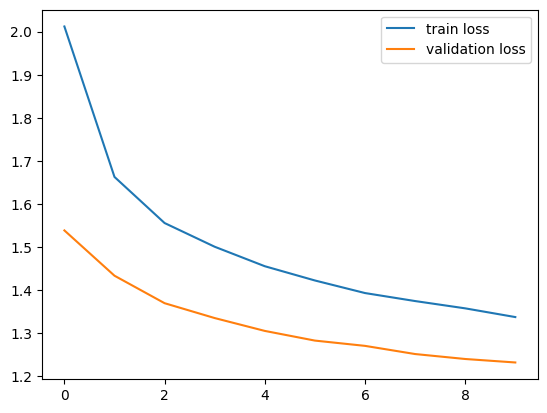

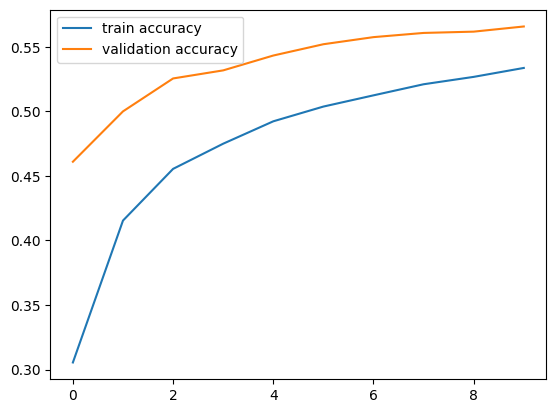

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['accuracy'], label='train accuracy')
plt.plot(h.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

InceptionNetV3

In [ ]:
from tensorflow.keras.applications import InceptionV3

In [ ]:
convolutional_base = InceptionV3(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
convolutional_base.summary()

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "inception_v3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_9             │ (None, 150, 150, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 74, 74, 32)     │            864 │ input_layer_9[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_9     │ (None, 74, 74, 32)     │             96 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_38             │ (None, 74, 74, 32)     │              0 │ batch_normalization_9… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 72, 72, 32)     │          9,216 │ activation_38[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_10    │ (None, 72, 72, 32)     │             96 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_39             │ (None, 72, 72, 32)     │              0 │ batch_normalization_1… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 72, 72, 64)     │         18,432 │ activation_39[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_11    │ (None, 72, 72, 64)     │            192 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_40             │ (None, 72, 72, 64)     │              0 │ batch_normalization_1… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 35, 35, 64)     │              0 │ activation_40[0][0]    │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 35, 35, 80)     │          5,120 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_12    │ (None, 35, 35, 80)     │            240 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_41             │ (None, 35, 35, 80)     │              0 │ batch_normalization_1… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)    

 Total params: 21,802,784 (83.17 MB)

 Trainable params: 21,768,352 (83.04 MB)

 Non-trainable params: 34,432 (134.50 KB)

In [ ]:
# Build the model
model = models.Sequential()
model.add(layers.Resizing(150, 150, interpolation="bilinear", input_shape=(32, 32, 3)))
model.add(convolutional_base)           # Add InceptionV3 base
model.add(layers.GlobalAveragePooling2D())  # Use global average pooling
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer=optimizers.Adam(learning_rate=1e-4),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 208s 109ms/step - accuracy: 0.4074 - loss: 1.7838 - val_accuracy: 0.8808 - val_loss: 0.4315
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 149s 106ms/step - accuracy: 0.8161 - loss: 0.7181 - val_accuracy: 0.9187 - val_loss: 0.2993
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 142s 106ms/step - accuracy: 0.8835 - loss: 0.5002 - val_accuracy: 0.9212 - val_loss: 0.2703
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 140s 104ms/step - accuracy: 0.9100 - loss: 0.3983 - val_accuracy: 0.9187 - val_loss: 0.2840
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 117s 104ms/step - accuracy: 0.9255 - loss: 0.3248 - val_accuracy: 0.9205 - val_loss: 0.2737
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 144s 106ms/step - accuracy: 0.9415 - loss: 0.2645 - val_accuracy: 0.9247 - val_loss: 0.2628
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 140s 104ms/step - accuracy: 0.9501 - loss: 0.2282 - val_accuracy: 0.9128 - val_loss: 0.3434
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 143s 105ms/step - ac

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)


313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 46ms/step - accuracy: 0.9257 - loss: 0.3092
Test Accuracy = 0.9254000186920166


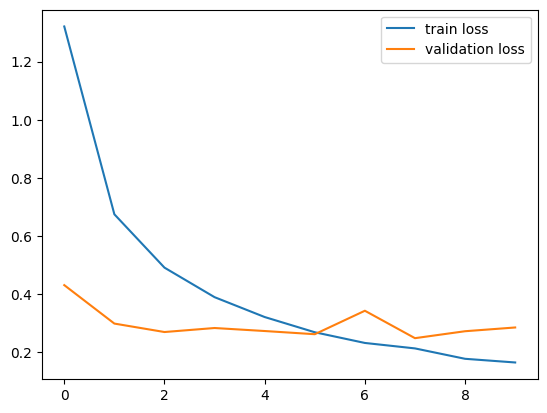

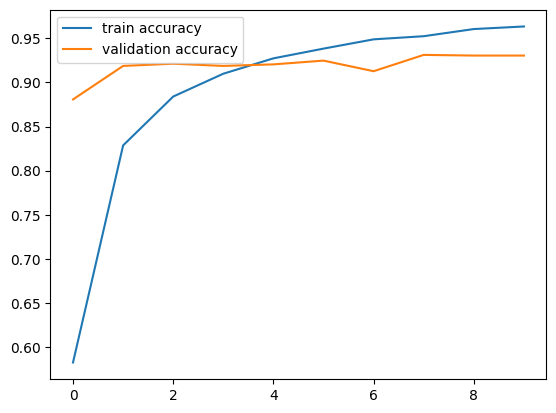

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['accuracy'], label='train accuracy')
plt.plot(h.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

Resnet101


In [ ]:
from tensorflow.keras.applications import ResNet101

In [ ]:
convolutional_base = ResNet101(weights='imagenet', include_top=False, input_shape=(256,256,3))
convolutional_base.summary()

171446536/171446536 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "resnet101"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_12            │ (None, 256, 256, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 262, 262, 3)    │              0 │ input_layer_12[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 128, 128, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 128, 128, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 128, 128, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 130, 130, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 64, 64, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 64, 64, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 64, 64, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 64, 64, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 64, 64, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 64, 64, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 64, 64, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 64, 64, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 64, 64, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 42,658,176 (162.73 MB)

 Trainable params: 42,552,832 (162.33 MB)

 Non-trainable params: 105,344 (411.50 KB)

In [ ]:
num_of_classes = 10

model = models.Sequential()
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(convolutional_base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(num_of_classes, activation='softmax'))

In [ ]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5), loss='sparse_categorical_crossentropy', metrics=['acc'])

In [ ]:
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 784s 611ms/step - acc: 0.3519 - loss: 1.9612 - val_acc: 0.7467 - val_loss: 0.8835
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 665s 589ms/step - acc: 0.7231 - loss: 0.9451 - val_acc: 0.9147 - val_loss: 0.3708
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 682s 589ms/step - acc: 0.8422 - loss: 0.6486 - val_acc: 0.9283 - val_loss: 0.2983
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 701s 606ms/step - acc: 0.8974 - loss: 0.4802 - val_acc: 0.9345 - val_loss: 0.2553
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 663s 589ms/step - acc: 0.9344 - loss: 0.3689 - val_acc: 0.9360 - val_loss: 0.2383
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 701s 606ms/step - acc: 0.9530 - loss: 0.2880 - val_acc: 0.9495 - val_loss: 0.1944
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 682s 606ms/step - acc: 0.9653 - loss: 0.2403 - val_acc: 0.9480 - val_loss: 0.1908
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 682s 606ms/step - acc: 0.9734 - loss: 0.1982 - val_acc: 0.9420 - val_loss: 0.2094
Epoch 9/

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 66s 191ms/step - acc: 0.9451 - loss: 0.2164
Test Accuracy = 0.9458000063896179


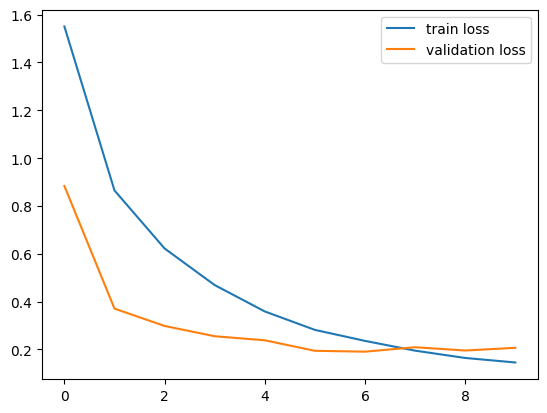

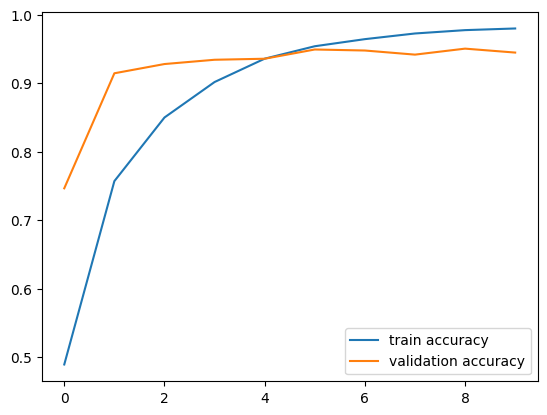

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()